In [2]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [1]:
%cd /gdrive/My Drive/Colab Notebooks

/gdrive/My Drive/Colab Notebooks


In [4]:
ls

64x3-CNN.model       intern_test_2.ipynb  notH_2.jpg  test_human.jpg
datasets/            logs/                notH_4.jpg  X.pickle
intern_test_1.ipynb  notH_1.jpg           stick.jpg   y.pickle


In [0]:
# !ls "/content/drive/My Drive/"

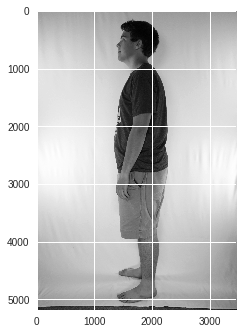

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "datasets"

CATEGORIES = ["Human", "Nothuman"]

for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display

        break  
    break 

In [19]:
print(img_array)

[[149 149 149 ... 145 144 143]
 [149 149 149 ... 144 147 147]
 [147 148 150 ... 144 145 143]
 ...
 [ 53  51  51 ...  27  27  27]
 [ 51  51  52 ...  29  29  30]
 [ 51  49  50 ...  34  34  35]]


In [23]:
print(img_array.shape)

(5184, 3456)


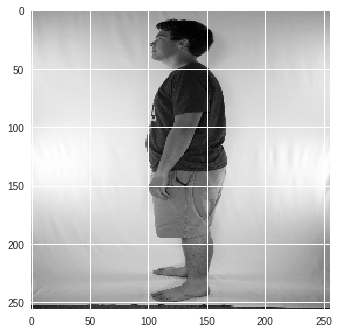

In [22]:
IMG_SIZE = 256               #as asked in the question 


new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [24]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  #humans and nothuman

        path = os.path.join(DATADIR,category)  # create path to human and nothuman
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=human 1=nothuman

        for img in tqdm(os.listdir(path)):  # iterate over each image per human and nonhuman
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest of keeping the output clean
                pass
            #except OSError as e:
            #    print("OSErroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 505/505 [02:15<00:00,  3.92it/s]

1009


In [0]:
import random

random.shuffle(training_data)

In [26]:
for sample in training_data[:10]:
    print(sample[1])

1
1
0
0
1
0
0
0
1
1


In [27]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[ 23]
   [ 23]
   [ 22]
   ...
   [ 25]
   [ 36]
   [ 40]]

  [[ 46]
   [ 46]
   [ 46]
   ...
   [ 47]
   [ 64]
   [ 68]]

  [[ 58]
   [ 59]
   [ 59]
   ...
   [ 53]
   [ 68]
   [ 74]]

  ...

  [[176]
   [172]
   [167]
   ...
   [159]
   [164]
   [170]]

  [[160]
   [160]
   [159]
   ...
   [151]
   [153]
   [154]]

  [[ 29]
   [ 29]
   [ 31]
   ...
   [ 38]
   [ 37]
   [ 36]]]]


In [0]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [0]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [36]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=10, epochs=3, validation_split=0.3)

Train on 706 samples, validate on 303 samples
Epoch 1/3
706/706 [==============================] - 30s 43ms/sample - loss: 7.9091 - acc: 0.5000 - val_loss: 8.2452 - val_acc: 0.4884
Epoch 2/3
706/706 [==============================] - 30s 42ms/sample - loss: 7.9677 - acc: 0.5057 - val_loss: 8.2452 - val_acc: 0.4884
Epoch 3/3
706/706 [==============================] - 30s 42ms/sample - loss: 7.9677 - acc: 0.5057 - val_loss: 8.2452 - val_acc: 0.4884


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
#  callbakcs @ the log file in drive 
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

dense_layers = [0]
layer_sizes = [64]
conv_layers = [3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())

            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))

            tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

            model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          )

            model.fit(X, y,
                      batch_size=32,
                      epochs=10,
                      validation_split=0.3,
                      callbacks=[tensorboard])

model.save('64x3-CNN.model')

3-conv-64-nodes-0-dense-1554648448
Instructions for updating:
Colocations handled automatically by placer.
Train on 706 samples, validate on 303 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
706/706 [==============================] - 9s 13ms/sample - loss: 0.2330 - acc: 0.8683 - val_loss: 0.0131 - val_acc: 0.9934
Epoch 2/10
706/706 [==============================] - 5s 6ms/sample - loss: 0.0080 - acc: 0.9972 - val_loss: 1.1315e-04 - val_acc: 1.0000
Epoch 3/10
706/706 [==============================] - 5s 6ms/sample - loss: 2.8831e-05 - acc: 1.0000 - val_loss: 4.0053e-05 - val_acc: 1.0000
Epoch 4/10
706/706 [==============================] - 5s 6ms/sample - loss: 1.0117e-05 - acc: 1.0000 - val_loss: 1.7439e-05 - val_acc: 1.0000
Epoch 5/10
706/706 [==============================] - 5s 6ms/sample - loss: 7.4592e-06 - acc: 1.0000 - val_loss: 2.6709e-05 - val_acc: 1.0000
Epoch 6/10
706/706 [==============================] - 5s 6ms/sample - loss: 6.1848e-06 - acc: 1.0000

In [44]:
# USING THE MODEL 
print (10*'####################### | #############################\n')
print ('####################### V #############################\n')

####################### | #############################
####################### | #############################
####################### | #############################
####################### | #############################
####################### | #############################
####################### | #############################
####################### | #############################
####################### | #############################
####################### | #############################
####################### | #############################

####################### V #############################



In [9]:
import cv2
import tensorflow as tf

CATEGORIES = ["Human", "Nothuman"]


def prepare(filepath):
    IMG_SIZE = 256  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)


model = tf.keras.models.load_model("64x3-CNN.model")

prediction = model.predict([prepare('test_human.jpg')])
print(prediction)  # will be a list in a list.
print(CATEGORIES[int(prediction[0][0])])

[[0.]]
Human


In [48]:
import cv2
import tensorflow as tf

CATEGORIES = ["Human", "Nothuman"]


def prepare(filepath):
    IMG_SIZE = 256  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)


model = tf.keras.models.load_model("64x3-CNN.model")

prediction = model.predict([prepare('notH_1.jpg')])
print(prediction)  # will be a list in a list.
print(CATEGORIES[int(prediction[0][0])])

[[1.]]
Nothuman


In [0]:
import cv2
import tensorflow as tf

CATEGORIES = ["Human", "Nothuman"]


def prepare(filepath):
    IMG_SIZE = 256  # 256 as per the need 
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)


model = tf.keras.models.load_model("64x3-CNN.model")

prediction = model.predict([prepare('notH_1.jpg')])
print(prediction)  # will be a list in a list.
print(CATEGORIES[int(prediction[0][0])])

In [3]:
print (10 * 'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz\n')

zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz
zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz
zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz
zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz
zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz
zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz
zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz
zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz
zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz
zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz



In [12]:
ls


64x3-CNN.model       intern_test_2.ipynb  notH_2.jpg  test_human.jpg
datasets/            logs/                notH_4.jpg  X.pickle
intern_test_1.ipynb  notH_1.jpg           stick.jpg   y.pickle


In [10]:
ls

64x3-CNN.model       logs/       saipraneeth_jasti_64x3-CNN.model  y.pickle
datasets/            notH_1.jpg  stick.jpg
intern_test_1.ipynb  notH_2.jpg  test_human.jpg
intern_test_2.ipynb  notH_4.jpg  X.pickle
